## Figuring Out the Goal:

    We want to predict how much customers should pay for insurance using given information. This helps the company set the     right prices.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [98]:
df=pd.read_csv('insurance.csv')

## Data Understanding:

In [86]:
df.sample(5)

age   sex     bmi  children smoker     region      charges
1247   33  male  29.400         4     no  southwest   6059.17300
721    53  male  36.600         3     no  southwest  11264.54100
686    42  male  26.125         2     no  northeast   7729.64575
273    50  male  27.455         1     no  northeast   9617.66245
786    60  male  36.955         0     no  northeast  12741.16745

In [87]:
df.shape

(1338, 7)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


    We observe that the dataset comprises 7 variables and 1338 observations. It appears that the data frame does not contain any missing values.

In [89]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [90]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

    It's readily apparent that the age range spans from 18 to 64, with negligible disparity between the mean and median age values.

    Furthermore, a conspicuous observation is the remarkably high maximum charge value of 6377.42. This value appears noteworthy and warrants closer examination during the data visualization phase.

Symmetric Distribution (No Skewness):

    Q1, Q2, and Q3 are approximately equal.
    The median (Q2) is close to the mid-range of the data.
    The distribution is roughly balanced around the median.
    
Positive Skewness (Right Skewed):

    Q1 is significantly lower than Q2, and Q2 is closer to Q3.
    The median (Q2) is less than the mean.
    The tail of the distribution extends more towards higher values.
    Common in financial data (e.g., income, stock returns).
    
Negative Skewness (Left Skewed):

    Q3 is significantly lower than Q2, and Q2 is closer to Q1.
    The median (Q2) is greater than the mean.
    The tail of the distribution extends more towards lower values.
    Common in data like exam scores (where a minimum score is possible).
    
Idea:

    If the range between Q1 and Q3 is roughly equal, the data is likely symmetric.
    
    If the range between Q1 and Q3 is larger on one side, it indicates skewness in that direction.
    
    If Q3 - Q2 is much larger than Q2 - Q1, it indicates positive (right) skewness. The tail on the right side is longer, and the median is dragged towards the lower values.

    If Q2 - Q1 is much larger than Q3 - Q2, it indicates negative (left) skewness. The tail on the left side is longer, and the median is dragged towards the higher values.

In [91]:
df.describe(include=object)

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

The "top" indicates the most frequent value, and "freq" shows how often that value appears. 

We see that the most frequent value for sex is male and shown in the dataset 676 times.

There are 4 unique regions in our dataset and the most frequent value is southeast and 364 times counted in the data.

Most people are not smokers with a number of 1064 observations.

In [92]:
list(df['region'].unique())

['southwest', 'southeast', 'northwest', 'northeast']

## Data Cleaning:

In [93]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Luckily, there are no missing values in this dataset

In [94]:
df.duplicated().sum()

1

In [95]:
df[df.duplicated(keep=False)]

age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631

In [96]:
df[df.duplicated(keep='first')]

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [13]:
df.drop_duplicates(keep='first',inplace=True)

## Data Visualization:

### Univariate Analysis:

We can perform univariate analysis with 3 options :

    Summary Statistics
    Frequency Distributions Table
    Charts ( Boxplot, Histogram, Barplot, Pie Chart)

#### Charges:

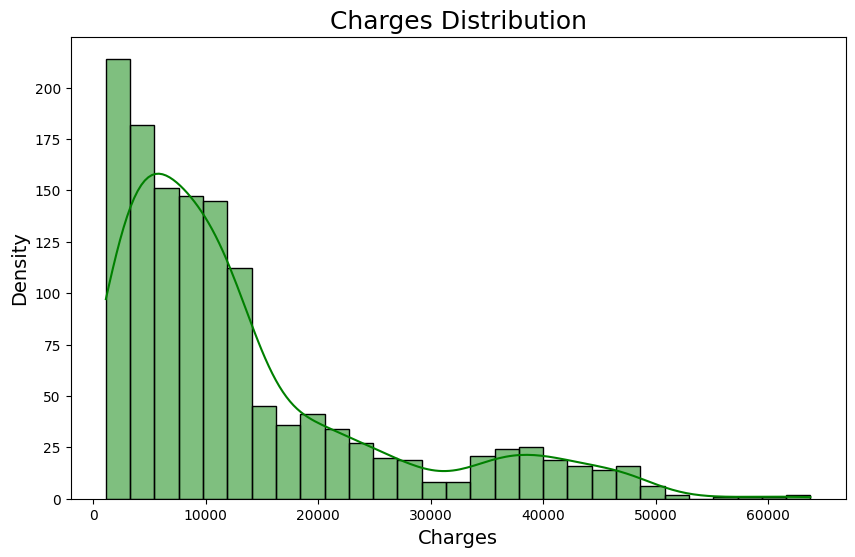

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['charges'],kde=True,color='green')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

We see that our data looks like the right(positive) skewed. Most of the charges are between 1121 – 10000 dollars.

#### Age:

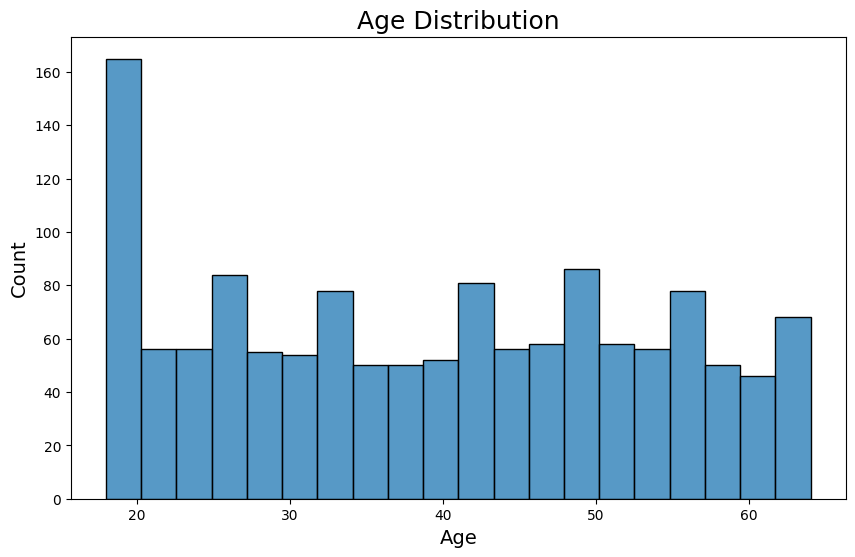

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins=20)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
# plt.xticks(range(int(df['age'].min()), int(df['age'].max()) + 1))
plt.show()

The distribution looks like a uniform distribution. A uniform distribution has equal probabilities for all the values within a range!

In [57]:
a=df[df['age']==18].shape[0]
b=df[df['age']==19].shape[0]
c=df[df['age']==20].shape[0]
print('Customers whose age is exactly 18:',a)
print('Customers whose age is exactly 19:',b)
print('Customers whose age is exactly 20:',c)

Customers whose age is exactly 18: 69
Customers whose age is exactly 19: 67
Customers whose age is exactly 20: 29


We see that most of the customers are 18–19 years old.

### BMI:

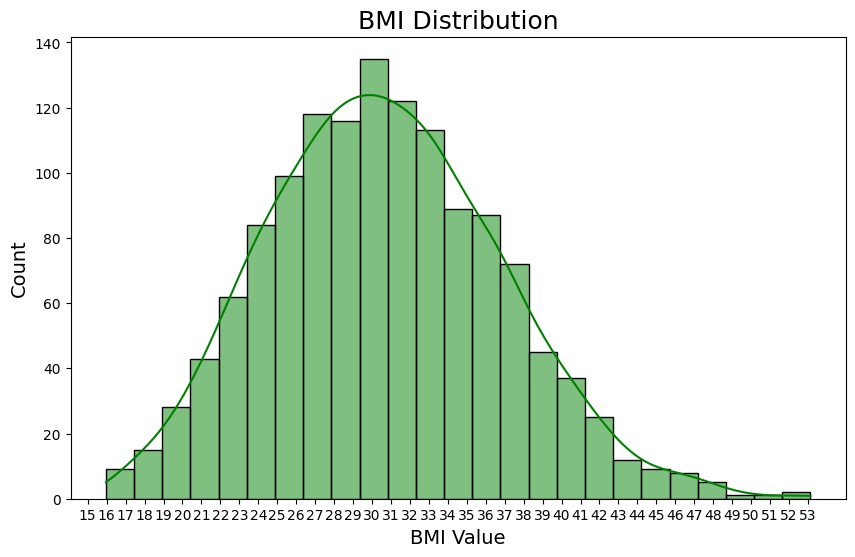

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(df.bmi,color='g',kde=True)
plt.xlabel('BMI Value',size=14)
plt.ylabel('Count',size=14)
plt.title('BMI Distribution',size=18)
plt.xticks(range(int(df['bmi'].min()), int(df['bmi'].max()) + 1))
plt.show()

BMI of people seems like a normal distribution Most people have BMI between 27 -34!

### Boxplot for Numerical Values:

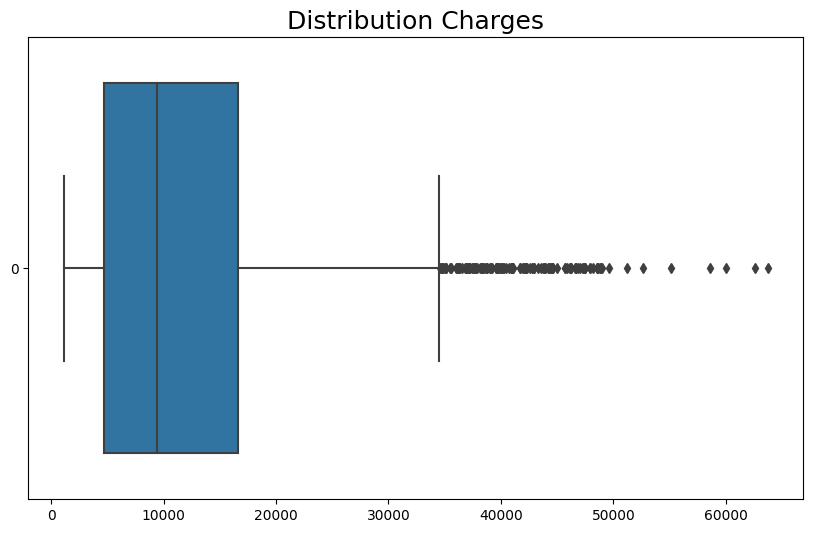

In [81]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges,orient='h')
plt.title('Distribution Charges',size=18)
plt.show()

In [82]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


In [97]:
Upper_Quartile=Q3+1.5*IQR
Lower_Quartile=Q1-1.5*IQR
df[(df['charges']<Lower_Quartile) | (df['charges'] > Upper_Quartile)]

age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]

 In this example. I will proceed with my analysis without removing outliers.

## Univariate Analysis for Categorical Features:

A bar chart is commonly used to visualize categorical features. We will use sns.countplot() method for sex, children, smoker and region variables.

#### Gender:

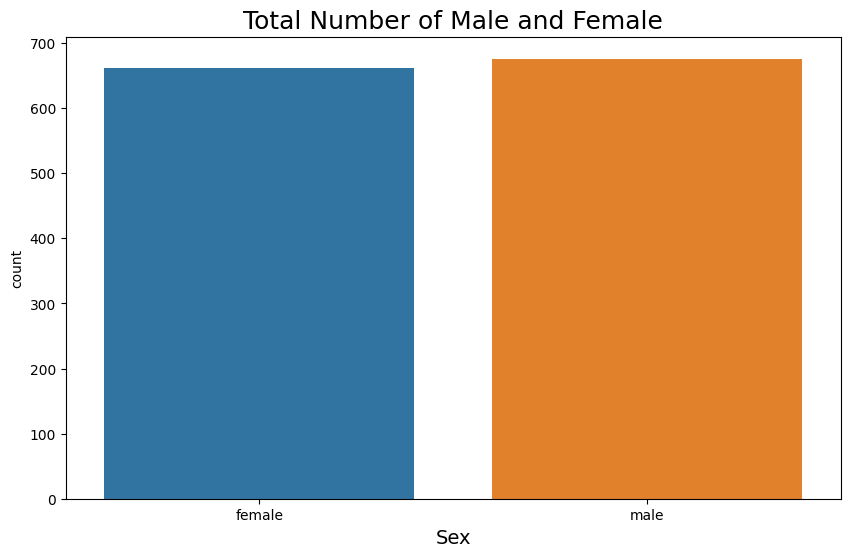

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(data = df,x = 'sex')
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

    Female and Male customers have almost the same number within the variable.

#### Children:

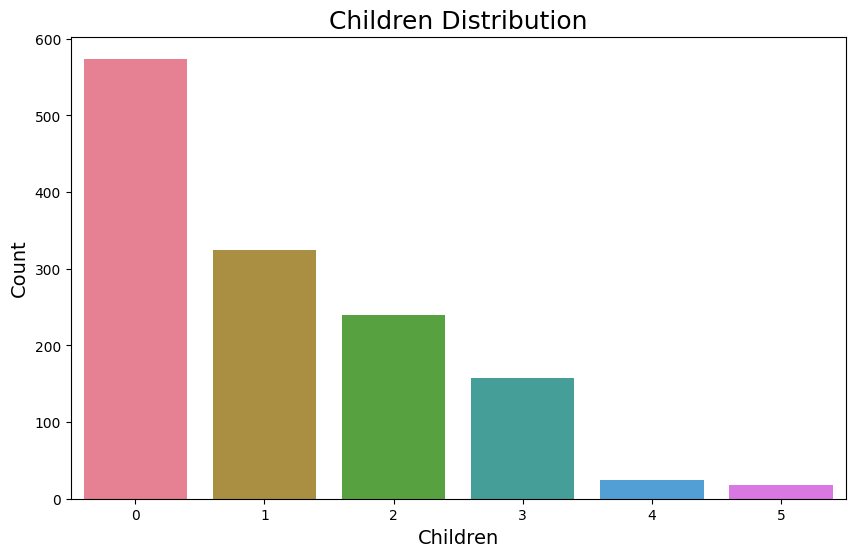

In [104]:
plt.figure(figsize = (10,6))
sns.countplot(data=df,x='children',palette='husl')
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()

    The majority of the people do not have any children.

    Few people have 4 and 5 children.

#### Smoker:


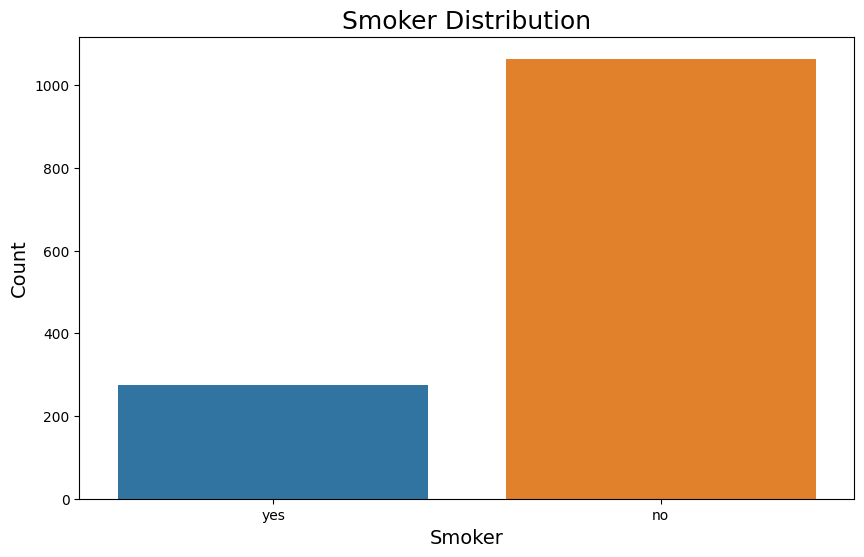

In [106]:
plt.figure(figsize = (10,6))
sns.countplot(data=df,x='smoker')
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [107]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

#### Region:

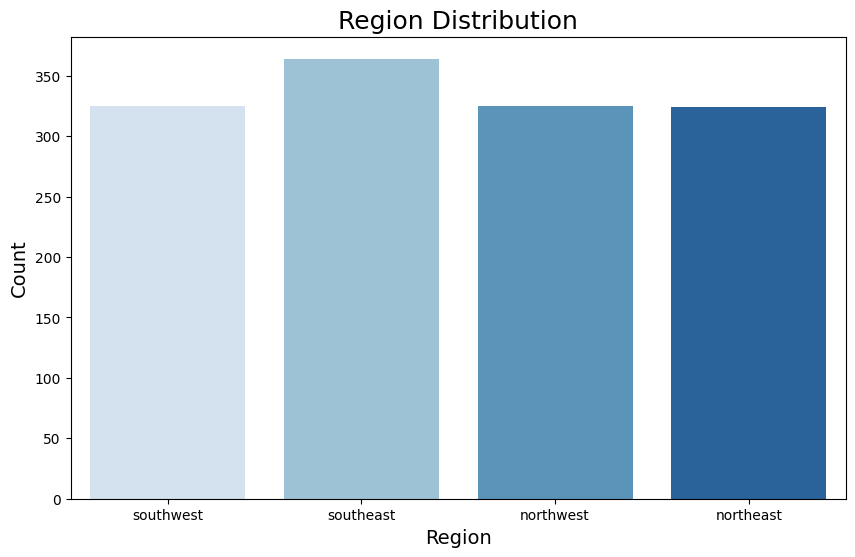

In [109]:
plt.figure(figsize = (10,6))
sns.countplot(data=df,x='region',palette='Blues')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [110]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

    All four regions are almost equally distributed. The number of people from the southeast is slightly more than others.

## Bivariate Analysis:

        Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships           between two variables.

        For bivariate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or           contingency table(categorical vs categorical).

#### Age vs Charges:

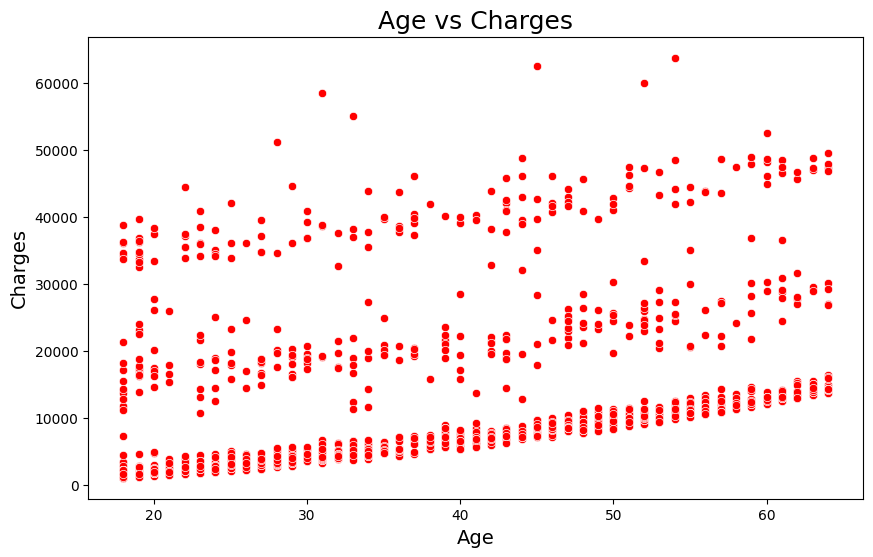

In [111]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',color='r',data=df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

A scatterplot is a type of data display that shows the relationship between two numerical variables.

We see that there is a weak positive relationship between age and charges values. As age increases charges also slightly increase.

In [113]:
print('Correlation between age and charges is : {}'.format(round(df.corr(numeric_only=True)['age']['charges'],3)))

Correlation between age and charges is : 0.299


## Smoker Vs Charges:

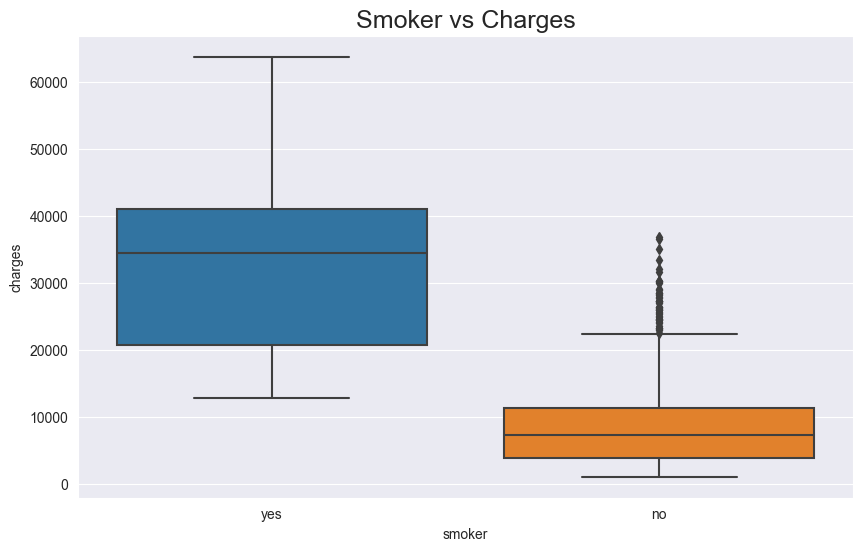

In [125]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18);

    The boxplot shows us the cost of insurance for smokers is higher than for non-smokers.

#### Pairplot(Numerical-Numerical):

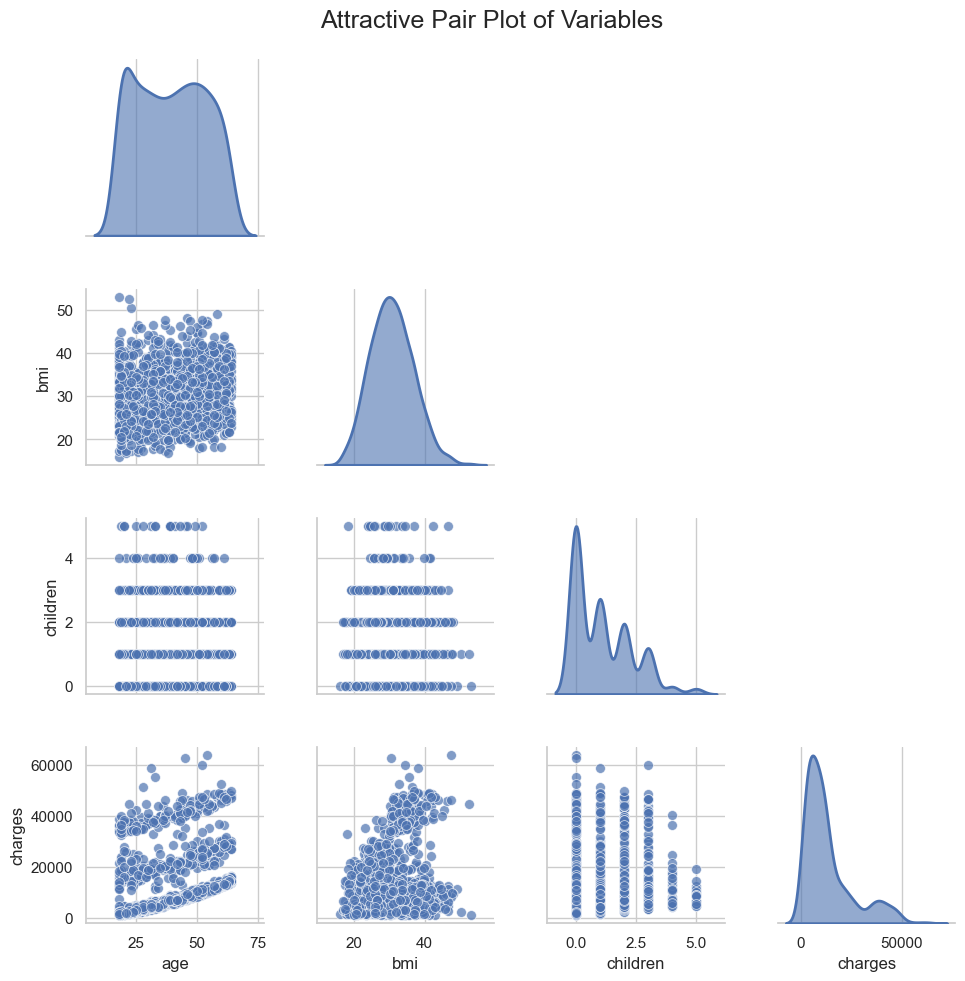

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="whitegrid")

# Create a pair plot with enhanced settings
pairplot = sns.pairplot(df,
                        diag_kind="kde",
                        kind='scatter',
                        palette='viridis',
                        markers='o',
                        plot_kws={'alpha': 0.7, 's': 50},
                        diag_kws={'alpha': 0.6, 'linewidth': 2},
                        corner=True)

# Customize the main title
pairplot.fig.suptitle("Pair Plot of Variables", size=18)

# Adjust the spacing between plots
plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.3)

# Show the pair plot
plt.show()


#### Multivariate Analysis:

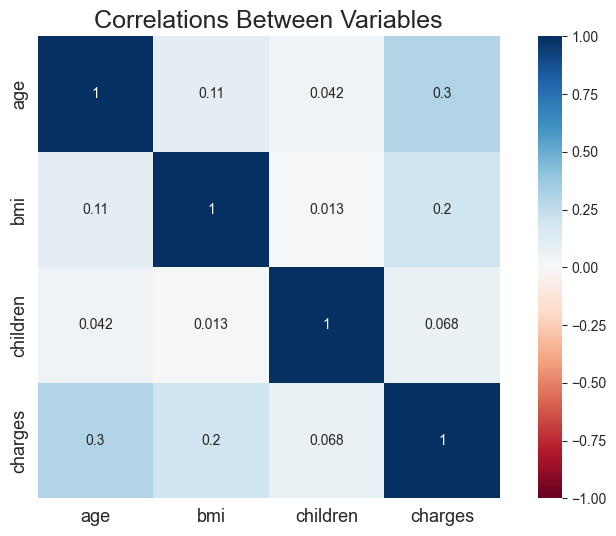

In [146]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

    The heatmap shows us there is a correlation between age and charges. As the age increases insurance charges also increase or vice versa.

    We can also see that there is a weak correlation between BMI and charges.

    There is almost no relationship between children and charges.